In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import re as re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pickle

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('car.csv')
df.head()

Unnamed: 0                              Name  Year  Kilometers_Driven  \
0           0            Maruti Wagon R LXI CNG  2010              72000   
1           1  Hyundai Creta 1.6 CRDi SX Option  2015              41000   
2           2                      Honda Jazz V  2011              46000   
3           3                 Maruti Ertiga VDI  2012              87000   
4           4   Audi A4 New 2.0 TDI Multitronic  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Price  
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp   1.75  
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp  12.50  
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp   4.50  
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp   6.00  
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp  17.74

In [3]:
df.describe()

Unnamed: 0         Year  Kilometers_Driven        Price
count  6019.000000  6019.000000       6.019000e+03  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     9.479468
std    1737.679967     3.269742       9.126884e+04    11.187917
min       0.000000  1998.000000       1.710000e+02     0.440000
25%    1504.500000  2011.000000       3.400000e+04     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.640000
75%    4513.500000  2016.000000       7.300000e+04     9.950000
max    6018.000000  2019.000000       6.500000e+06   160.000000

In [4]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

# Preprocessing

In [5]:
df.dropna(inplace = True)

In [6]:
del df['Unnamed: 0']

In [7]:
df.head()

Name  Year  Kilometers_Driven Fuel_Type  \
0            Maruti Wagon R LXI CNG  2010              72000       CNG   
1  Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                      Honda Jazz V  2011              46000    Petrol   
3                 Maruti Ertiga VDI  2012              87000    Diesel   
4   Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   

  Transmission Owner_Type     Mileage   Engine      Power  Price  
0       Manual      First  26.6 km/kg   998 CC  58.16 bhp   1.75  
1       Manual      First  19.67 kmpl  1582 CC  126.2 bhp  12.50  
2       Manual      First   18.2 kmpl  1199 CC   88.7 bhp   4.50  
3       Manual      First  20.77 kmpl  1248 CC  88.76 bhp   6.00  
4    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp  17.74

In [8]:
df['Age'] = 2020 - df['Year']
df.drop('Year',axis=1,inplace = True)

In [9]:
mileage = df["Mileage"].str.split(" ", expand = True)
df["Mileage"] = pd.to_numeric(mileage[0], errors = 'coerce')

In [10]:
power = df["Power"].str.split(" ", expand = True)
df["Power"] = pd.to_numeric(power[0], errors = 'coerce')

In [11]:
engine = df["Engine"].str.split(" ", expand = True)
df["Engine"] = pd.to_numeric(engine[0], errors = 'coerce')

In [12]:
df.head()

Name  Kilometers_Driven Fuel_Type Transmission  \
0            Maruti Wagon R LXI CNG              72000       CNG       Manual   
1  Hyundai Creta 1.6 CRDi SX Option              41000    Diesel       Manual   
2                      Honda Jazz V              46000    Petrol       Manual   
3                 Maruti Ertiga VDI              87000    Diesel       Manual   
4   Audi A4 New 2.0 TDI Multitronic              40670    Diesel    Automatic   

  Owner_Type  Mileage  Engine   Power  Price  Age  
0      First    26.60     998   58.16   1.75   10  
1      First    19.67    1582  126.20  12.50    5  
2      First    18.20    1199   88.70   4.50    9  
3      First    20.77    1248   88.76   6.00    8  
4     Second    15.20    1968  140.80  17.74    7

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5981 non-null   object 
 1   Kilometers_Driven  5981 non-null   int64  
 2   Fuel_Type          5981 non-null   object 
 3   Transmission       5981 non-null   object 
 4   Owner_Type         5981 non-null   object 
 5   Mileage            5981 non-null   float64
 6   Engine             5981 non-null   int64  
 7   Power              5874 non-null   float64
 8   Price              5981 non-null   float64
 9   Age                5981 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 514.0+ KB


# Exploratory Data Analysis

In [14]:
df.columns

Index(['Name', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Price', 'Age'],
      dtype='object')

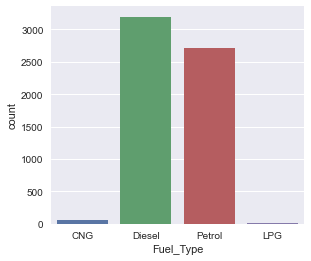

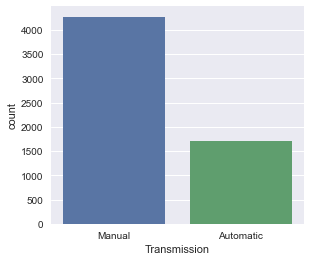

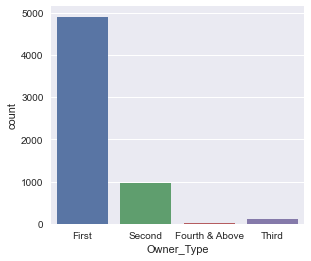

In [15]:
cat_cols = ['Fuel_Type','Transmission','Owner_Type']  #array where matched values will be printed
i=0
while i < 3:
    fig = plt.figure(figsize=[10,4])
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

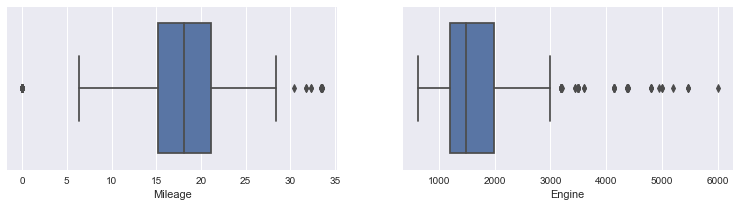

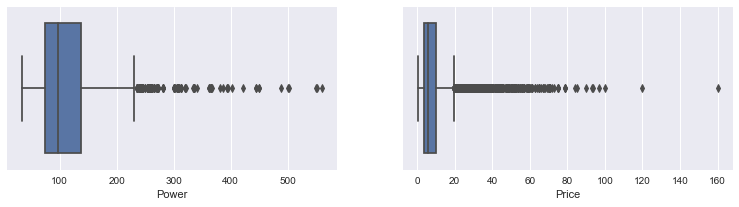

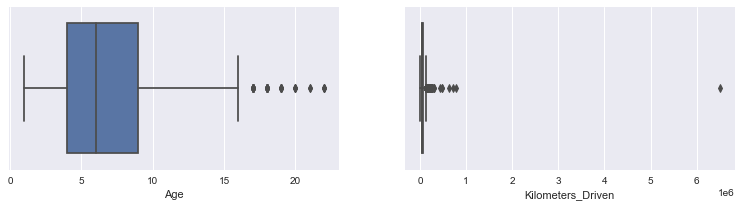

In [16]:
num_cols = ['Mileage', 'Engine','Power','Price','Age','Kilometers_Driven']
i=0
while i < 6:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [17]:
df[df['Mileage'] > df['Mileage'].quantile(0.99)]

Name  Kilometers_Driven Fuel_Type  \
17                Maruti Swift DDiS VDI              25000    Diesel   
53                     Maruti Swift VDI              65650    Diesel   
275                    Maruti Swift VDI              31025    Diesel   
879          Maruti Swift DDiS ZDI Plus               5456    Diesel   
892                    Maruti Swift ZDI              52000    Diesel   
1247                   Maruti Swift VDI              34613    Diesel   
1269  Maruti Alto 800 2016-2019 CNG LXI              10600       CNG   
1301                   Maruti Swift LDI              14000    Diesel   
1332             Maruti Wagon R CNG LXI              79494       CNG   
1519          Maruti Dzire AMT ZDI Plus              28226    Diesel   
1756              Maruti Swift DDiS VDI             150000    Diesel   
1794          Maruti Dzire AMT ZDI Plus              41747    Diesel   
1844         Maruti Swift DDiS ZDI Plus               2000    Diesel   
1920                   Maruti Dzire VDI              45376    Diesel   
1934              Maruti Dzire ZDI Plus              24000    Diesel   
1990                   Maruti Dzire VDI              74000    Diesel   
2059             Maruti Wagon R CNG LXI              54000       CNG   
2094                   Maruti Dzire VDI              28193    Diesel   
2151                   Maruti Swift VDI              84000    Diesel   
2290                   Maruti Swift VDI              62192    Diesel   
2371             Maruti Wagon R CNG LXI              29202       CNG   
2438                   Maruti Dzire VDI             110000    Diesel   
2519                   Maruti Swift VDI              30000    Diesel   
2701          Maruti Celerio CNG VXI MT              70536       CNG   
2715          Maruti Swift AMT DDiS VDI              11000    Diesel   
2759               Maruti Swift AMT VDI              11500    Diesel   
3012                   Maruti Swift LDI              52000    Diesel   
3040                   Maruti Swift VDI              53500    Diesel   
3119   Maruti Alto K10 LXI CNG Optional              44202       CNG   
3129             Maruti Wagon R CNG LXI              74663       CNG   
3173                   Maruti Dzire LDI             150000    Diesel   
3239                   Maruti Dzire ZDI              56454    Diesel   
3524                   Maruti Swift VDI              63310    Diesel   
3553  Maruti Alto 800 2016-2019 CNG LXI              18000       CNG   
3582          Maruti Dzire AMT ZDI Plus              19000    Diesel   
3786                   Maruti Swift VDI             115000    Diesel   
3869  Maruti Alto 800 2016-2019 CNG LXI              65537       CNG   
3889                   Maruti Dzire VDI              77084    Diesel   
4141             Maruti Wagon R CNG LXI              47200       CNG   
4147                   Maruti Dzire VDI              54758    Diesel   
4328              Maruti Swift DDiS VDI              41075    Diesel   
4495          Maruti Dzire AMT ZDI Plus              64035    Diesel   
4769  Maruti Alto 800 2016-2019 CNG LXI              24310       CNG   
4934               Maruti Dzire AMT VDI              25082    Diesel   
5086                   Maruti Dzire VDI              68434    Diesel   
5178          Maruti Celerio CNG VXI MT              64687       CNG   
5265                   Maruti Swift VDI              62000    Diesel   
5375                   Maruti Swift LDI              39437    Diesel   
5505                   Maruti Swift VDI             103000    Diesel   
5507                   Maruti Dzire LDI              48000    Diesel   
5710            Maruti Alto 800 CNG LXI              26200       CNG   
5935            Maruti Alto K10 LXI CNG              59525       CNG   
5940                   Maruti Dzire LDI              27000    Diesel   
6014                   Maruti Swift VDI              27365    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Price  Age  
17     

In [18]:
df[df['Engine'] > df['Engine'].quantile(0.99)]

Name  Kilometers_Driven  \
70                    Porsche Cayenne 2009-2014 Turbo              73000   
152             Mercedes-Benz S Class 2005 2013 S 500              35277   
459                Audi Q7 4.2 TDI Quattro Technology              51002   
586                Audi Q7 4.2 TDI Quattro Technology              79926   
589           Mercedes-Benz S Class 2005 2013 S 350 L              47088   
693                   Mercedes-Benz SLK-Class SLK 350              22732   
703                   Ford Endeavour 3.2 Trend AT 4X4              50484   
798                   Mercedes-Benz SLK-Class SLK 350              10000   
806                Ford Endeavour 3.2 Titanium AT 4X4              59636   
926                        Porsche Cayman 2009-2012 S              10000   
1038             Land Rover Range Rover TDV8 (Diesel)              55000   
1076               Ford Endeavour 3.2 Titanium AT 4X4              68000   
1093               Audi Q7 4.2 TDI Quattro Technology              50000   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel              66538   
1430                  Ford Endeavour 3.2 Trend AT 4X4              30552   
1596                          Audi Q7 4.2 FSI quattro              71000   
1724               Ford Endeavour 3.2 Titanium AT 4X4              38000   
1930          Mercedes-Benz S Class 2005 2013 S 350 L              55000   
2100                          Porsche Cayenne Turbo S              35000   
2305             Porsche Cayman 2009-2012 S tiptronic               8000   
2588                       Mitsubishi Montero 3.2 GLS             179032   
2669                  Ford Endeavour 3.2 Trend AT 4X4              51530   
2681                          Skoda Superb 3.6 V6 FSI              54000   
2978                    Porsche Panamera 2010 2013 4S              42400   
3028               Ford Endeavour 3.2 Titanium AT 4X4              61108   
3065      Mercedes-Benz E-Class 2009-2013 E350 Petrol              73000   
3079               Ford Endeavour 3.2 Titanium AT 4X4              29000   
3115                  Ford Endeavour 3.2 Trend AT 4X4              90000   
3196               Ford Endeavour 3.2 Titanium AT 4X4               9000   
3242         Land Rover Range Rover Vogue SE 4.4 SDV8              63000   
3341                     BMW 7 Series 2007-2012 750Li              50161   
3580        Mercedes-Benz CLS-Class 2006-2010 350 CDI              29000   
4039           Mercedes-Benz R-Class R350 4Matic Long              82000   
4136      Mercedes-Benz E-Class 2009-2013 E350 Petrol              68001   
4227                  Ford Endeavour 3.2 Trend AT 4X4              43000   
4342          Mercedes-Benz S Class 2005 2013 S 350 L             103000   
4388               Audi Q7 4.2 TDI Quattro Technology              50000   
4451                                  Ford Mustang V8              21290   
4559               Audi Q7 4.2 TDI Quattro Technology              73000   
4627                          BMW 6 Series 650i Coupe              65329   
4691                   Mercedes-Benz SLK-Class 55 AMG               3000   
4722                    Mercedes-Benz SL-Class SL 500              35000   
4821                          BMW 6 Series 630i Coupe               5900   
4869         Land Rover Range Rover 3.6 TDV8 Vogue SE              84384   
4906               Ford Endeavour 3.2 Titanium AT 4X4              15000   
4938               Audi Q7 4.2 TDI Quattro Technology              56238   
5088                  Jaguar XJ 5.0 L V8 Supercharged              43686   
5278               Ford Endeavour 3.2 Titanium AT 4X4              12000   
5323               Ford Endeavour 3.2 Titanium AT 4X4              17000   
5341                         Porsche Cayenne S Diesel              65003   
5414           Mercedes-Benz R-Class R350 4Matic Long              45710   
5416         Land Rover Range Rover Vogue SE 4.4 SDV8              75995   
5441               Fo

In [19]:
df[df['Power'] > df['Power'].quantile(0.99)]

Name  Kilometers_Driven  \
70                    Porsche Cayenne 2009-2014 Turbo              73000   
134                          Mercedes-Benz SLC 43 AMG              13372   
148                                    Audi RS5 Coupe              23000   
152             Mercedes-Benz S Class 2005 2013 S 500              35277   
326                      BMW 6 Series 640d Gran Coupe              30000   
418                    Mercedes-Benz GLC 43 AMG Coupe              22397   
459                Audi Q7 4.2 TDI Quattro Technology              51002   
586                Audi Q7 4.2 TDI Quattro Technology              79926   
589           Mercedes-Benz S Class 2005 2013 S 350 L              47088   
693                   Mercedes-Benz SLK-Class SLK 350              22732   
798                   Mercedes-Benz SLK-Class SLK 350              10000   
1038             Land Rover Range Rover TDV8 (Diesel)              55000   
1093               Audi Q7 4.2 TDI Quattro Technology              50000   
1123                     BMW 7 Series 2007-2012 740Li              66000   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel              66538   
1741                                BMW X6 xDrive 40d              58000   
1930          Mercedes-Benz S Class 2005 2013 S 350 L              55000   
1974                               BMW 7 Series 740Li              28060   
1984                               BMW 7 Series 740Li              17465   
2089                          BMW 6 Series 640d Coupe              30000   
2095                         Mercedes-Benz SLC 43 AMG               2526   
2100                          Porsche Cayenne Turbo S              35000   
2515                          BMW 6 Series Gran Coupe              21000   
2547                        BMW X6 xDrive 40d M Sport              25000   
2659                          Porsche Panamera Diesel              25100   
2896                          Porsche Panamera Diesel              48000   
2907                         Jaguar XJ 3.0L Portfolio              26000   
2978                    Porsche Panamera 2010 2013 4S              42400   
3132                             Porsche Cayenne Base              14298   
3242         Land Rover Range Rover Vogue SE 4.4 SDV8              63000   
3266             Mercedes-Benz E-Class E400 Cabriolet               7501   
3341                     BMW 7 Series 2007-2012 750Li              50161   
3489                          Porsche Panamera Diesel              19828   
4061                                   Audi RS5 Coupe              23312   
4185                          Porsche Panamera Diesel              54996   
4342          Mercedes-Benz S Class 2005 2013 S 350 L             103000   
4360                          BMW 6 Series Gran Coupe              20004   
4388               Audi Q7 4.2 TDI Quattro Technology              50000   
4451                                  Ford Mustang V8              21290   
4559               Audi Q7 4.2 TDI Quattro Technology              73000   
4627                          BMW 6 Series 650i Coupe              65329   
4691                   Mercedes-Benz SLK-Class 55 AMG               3000   
4722                    Mercedes-Benz SL-Class SL 500              35000   
4816                BMW 5 Series 2003-2012 540i Sedan              48000   
4821                          BMW 6 Series 630i Coupe               5900   
4869         Land Rover Range Rover 3.6 TDV8 Vogue SE              84384   
4893                   BMW Z4 2009-2013 Roadster 2.5i               9952   
4938               Audi Q7 4.2 TDI Quattro Technology              56238   
5088                  Jaguar XJ 5.0 L V8 Supercharged              43686   
5294                             BMW Z4 2009-2013 35i              25000   
5341                         Porsche Cayenne S Diesel              65003   
5416         Land Rover Range Rover Vogue SE 4.4 SDV8              75995   
5521                 

In [20]:
df[df['Price'] > df['Price'].quantile(0.99)]

Name  Kilometers_Driven  \
264                              Mercedes-Benz GLE 350d              29819   
282                  Audi Q7 3.0 TDI Quattro Technology              11287   
310                              Mercedes-Benz GLE 250d              29000   
327                   Audi Q7 45 TDI Quattro Technology              97430   
392           Mercedes-Benz S Class 2005 2013 S 350 CDI              56451   
418                      Mercedes-Benz GLC 43 AMG Coupe              22397   
655                            Jaguar XJ 2.0L Portfolio              10501   
918   BMW X5 2014-2019 xDrive 30d Design Pure Experi...              76000   
941   Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic              31427   
1038               Land Rover Range Rover TDV8 (Diesel)              55000   
1078                        Porsche Boxster S tiptronic              10512   
1194  Mercedes-Benz E-Class 2015-2017 E350 CDI Avant...              15000   
1336                  Audi Q7 45 TDI Quattro Technology              20002   
1352    Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel              66538   
1496                       Jaguar XJ 3.0L Portfolio LWB              17652   
1505                    Land Rover Range Rover Sport SE              26013   
1583                Audi Q7 45 TDI Quattro Premium Plus               6773   
1690                             Mercedes-Benz GLE 350d              40129   
1830                             Mercedes-Benz GLE 350d              33552   
1885               Mercedes-Benz GLS 350d Grand Edition               6000   
1974                                 BMW 7 Series 740Li              28060   
1984                                 BMW 7 Series 740Li              17465   
2095                           Mercedes-Benz SLC 43 AMG               2526   
2111                             Mercedes-Benz GLE 250d              25601   
2319                      Mercedes-Benz E-Class E 350 d               9312   
2328                          BMW X5 xDrive 30d M Sport            6500000   
2422                           Jaguar XJ 3.0L Portfolio              12000   
2509                      Mercedes-Benz E-Class E 220 d              11000   
2541  Mercedes-Benz E-Class 2015-2017 E350 CDI Avant...              21603   
2547                          BMW X6 xDrive 40d M Sport              25000   
2659                            Porsche Panamera Diesel              25100   
2767                             Mercedes-Benz GLE 350d              30706   
2808                             Mercedes-Benz GLE 350d              19863   
2907                           Jaguar XJ 3.0L Portfolio              26000   
3242           Land Rover Range Rover Vogue SE 4.4 SDV8              63000   
3268                             Mercedes-Benz GLE 350d              29277   
3489                            Porsche Panamera Diesel              19828   
3752                   Land Rover Range Rover Sport HSE              38467   
4079        Land Rover Range Rover 3.0 Diesel LWB Vogue              25000   
4101                          BMW X5 xDrive 30d M Sport              45000   
4185                            Porsche Panamera Diesel              54996   
4360                            BMW 6 Series Gran Coupe              20004   
4451                                    Ford Mustang V8              21290   
4527                             Mercedes-Benz GLE 350d              29000   
4614                                        BMW X5 X5 M              15000   
4691                     Mercedes-Benz SLK-Class 55 AMG               3000   
4893                     BMW Z4 2009-2013 Roadster 2.5i               9952   
5009                  Audi Q7 45 TDI Quattro Technology              59500   
5038              Land Rover Discovery Sport TD4 HSE 7S              24013   
5067       Land Rover Discovery Sport SD4 HSE Luxury 7S              17201   
5118                             Mercedes-Benz GLE 350d              2854

In [21]:
df[df['Age'] > df['Age'].quantile(0.99)]

Name  Kilometers_Driven Fuel_Type  \
274                    Maruti Zen VXI BSII              60000    Petrol   
315                        Tata Sumo Delux             158000    Diesel   
364                          Maruti Zen LX              65000    Petrol   
613              Mahindra Bolero ZLX BSIII             124000    Diesel   
631              Hyundai Santro LS zipPlus              70000    Petrol   
911                    Maruti Zen VXI BSII              61495    Petrol   
1221        Ambassador Classic Nova Diesel              80000    Diesel   
1224                         Maruti Zen VX              70000    Petrol   
1318                    Honda City 1.3 EXI              85000    Petrol   
1845                    Honda City 1.3 EXI             140000    Petrol   
1903      Skoda Octavia Classic 1.9 TDI MT              69000    Diesel   
1907                   Toyota Qualis FS B3              63000    Diesel   
1999         Mercedes-Benz E-Class 220 CDI             121000    Diesel   
2487                     Toyota Corolla DX              70000    Petrol   
2524              Maruti Wagon R VXI BSIII             101000    Petrol   
2554     Skoda Octavia Ambiente 1.9 TDI MT              99000    Diesel   
2656                    Maruti Wagon R VXI              93000    Petrol   
3138                        Maruti Zen LXI              95150    Petrol   
3189  Hyundai Santro GS zipDrive - Euro II              67000    Petrol   
3221                   Ford Ikon 1.3 Flair              65134    Petrol   
3228                        Maruti 800 Std              52000    Petrol   
3749     Mercedes-Benz E-Class 250 D W 210              55300    Diesel   
3806                    Honda City 1.5 EXI             125943    Petrol   
3854                   Hyundai Sonata GOLD              44200    Petrol   
3942                  Maruti 800 Std BSIII              53500    Petrol   
3963            Mitsubishi Lancer 1.5 SFXi             104000    Petrol   
4143          Mercedes-Benz S-Class 280 AT             111000    Petrol   
4351                 Maruti Esteem LX BSII              55000    Petrol   
4629                    Fiat Siena 1.2 ELX              70000    Petrol   
4658                  Maruti Alto LXi BSII              69966    Petrol   
4709                        Maruti 1000 AC             104000    Petrol   
4730                    Ford Ikon 1.6 CLXI              83000    Petrol   
4791                Mitsubishi Lancer GLXD             125000    Diesel   
4822                   Maruti Alto Vxi 1.1             103653    Petrol   
4863                 Hyundai Santro D Lite             140000    Petrol   
5040                Maruti Versa DX2 BS II              62000    Petrol   
5137               Maruti Zen VXi - BS III              90000    Petrol   
5432                         Maruti Zen LX              99024    Petrol   
5453                    Hyundai Accent GLE             130000    Petrol   
5643                     Maruti Wagon R LX             125000    Petrol   
5647                Toyota Qualis Fleet A3             227000    Diesel   
5657                        Maruti 800 Std              75000    Petrol   
5716                         Maruti Zen LX              95150    Petrol   
5914        Skoda Octavia Elegance 1.9 TDI             132000    Diesel   
5926                    Maruti 800 DX BSII              78000    Petrol   
5943               Mahindra Jeep MM 540 DP              75000    Diesel   

     Transmission      Owner_Type  Mileage  Engine  Power  Price  Age  
274        Manual           Third    17.30     993   60.0   0.55   18  
315        Manual          Second    14.07    2956   83.1   1.50   20  
364        Manual           First    17.30     993   60.0   0.65   17  
613        Manual           First    13.60    2523   63.0   1.95   20  
631        Manual           Third     0.00    1086    NaN   0.65   18  
911        Manual           Third    17.30     993   60.0   1.52   17  
1221    

In [22]:
df[df['Kilometers_Driven'] > df['Kilometers_Driven'].quantile(0.99)]

Name  Kilometers_Driven  \
29                  Toyota Innova 2.5 V Diesel 7-seater             262000   
64                                   Tata Indica V2 eLS             178000   
77                                 Toyota Innova 2.0 G1             230000   
181            Ford Fiesta 1.4 TDCi EXI Limited Edition             216000   
230                             Tata Indica V2 DLS BSII             200000   
340              Skoda Octavia Ambition Plus 2.0 TDI AT             775000   
358                               Hyundai i10 Magna 1.2             620000   
482            Ford Endeavour Hurricane Limited Edition             179000   
556                                Toyota Etios Liva GD             179000   
576              Audi A6 2011-2015 2.0 TDI Premium Plus             202082   
647                              Hyundai Santro Xing XP             200000   
792                         Ford Endeavour XLT TDCi 4X2             205000   
838                                    Mahindra Xylo H4             215000   
1013                            Mahindra Scorpio 2.6 LX             176000   
1068                               Toyota Etios Liva GD             225000   
1101                Toyota Innova 2.5 V Diesel 7-seater             248000   
1442                                Honda City 1.5 S MT             231673   
1447                           Ford Fiesta Diesel Style             177000   
1521              Toyota Innova 2.5 G (Diesel) 8 Seater             194000   
1528        Toyota Innova 2.5 G (Diesel) 8 Seater BS IV             299322   
1766  Mercedes-Benz New C-Class C 200 Kompressor Ele...             220000   
1846             Toyota Innova 2.5 GX (Diesel) 7 Seater             255000   
1860                   Volkswagen Vento Diesel Highline             720000   
1972                         Toyota Fortuner 3.0 Diesel             190000   
1975                            Skoda Superb 1.8 TSI MT             282000   
1986                  Volkswagen Vento Diesel Trendline             173000   
2033                                     Toyota Etios G             190000   
2093                Toyota Innova 2.5 V Diesel 7-seater             196000   
2267                                Toyota Qualis RS E2             215750   
2328                          BMW X5 xDrive 30d M Sport            6500000   
2346                              Mahindra Xylo D2 BSIV             234000   
2588                         Mitsubishi Montero 3.2 GLS             179032   
2620                     Tata Indica Vista Quadrajet LS             180000   
2644        Toyota Innova 2.5 G (Diesel) 8 Seater BS IV             178280   
2823    Volkswagen Jetta 2013-2015 2.0L TDI Highline AT             480000   
2988               Toyota Innova 2.5 G4 Diesel 8-seater             240000   
3092                               Honda City i VTEC SV             480000   
3252               Toyota Innova 2.5 G4 Diesel 8-seater             185200   
3408                            Mahindra Bolero SLX 2WD             193000   
3649                                     Tata Indigo LS             300000   
3713                               Chevrolet Captiva LT             232000   
3894                         Toyota Innova 2.5 GX 7 STR             250000   
4044                                      Volvo XC60 D5             173000   
4491                     Hyundai i20 Magna Optional 1.2             445000   
4499                         Toyota Fortuner 3.0 Diesel             193254   
4638                        Mahindra Xylo E4 ABS BS III             197000   
4719             Toyota Innova 2.5 GX (Diesel) 8 Seater             250000   
4792                         Toyota Fortuner 3.0 Diesel             242000   
4832                       Skoda Rapid 1.6 TDI Ambition             180000   
4944                             Maruti Swift Dzire VDI             197000   
5202       Toyota Innova 2.5 GX (Diesel) 7 Seater BS IV             20000

# Bivariate/Multi-Variate Analysis

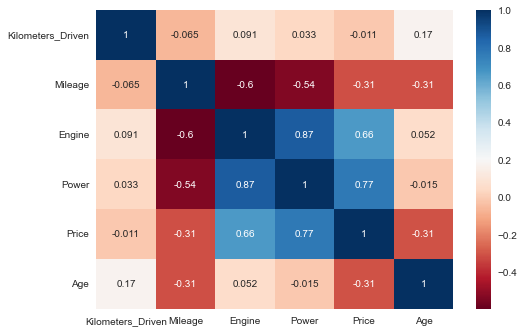

In [23]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [24]:
df.corr()['Price']

Kilometers_Driven   -0.011303
Mileage             -0.312886
Engine               0.658855
Power                0.772837
Price                1.000000
Age                 -0.306166
Name: Price, dtype: float64

In [25]:
df.pivot_table(values='Price', index = 'Owner_Type', columns= 'Fuel_Type')

Fuel_Type            CNG     Diesel      LPG    Petrol
Owner_Type                                            
First           3.747556  13.281864  2.54625  6.100426
Fourth & Above       NaN   3.290000      NaN  3.573333
Second          2.710000  11.093830  2.25000  4.073398
Third           1.200000   5.635476      NaN  4.593088

In [26]:
df.pivot_table(values='Price', index = 'Owner_Type', columns= 'Transmission')

Transmission    Automatic    Manual
Owner_Type                         
First           20.720741  5.669594
Fourth & Above   5.500000  3.095714
Second          16.245552  4.004186
Third           13.088333  2.713793

# Data Preparation

## Creating Dummies for Categorical Features

In [27]:
df.drop(labels='Name',axis= 1, inplace = True)

In [28]:
df.head()

Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60     998   
1              41000    Diesel       Manual      First    19.67    1582   
2              46000    Petrol       Manual      First    18.20    1199   
3              87000    Diesel       Manual      First    20.77    1248   
4              40670    Diesel    Automatic     Second    15.20    1968   

    Power  Price  Age  
0   58.16   1.75   10  
1  126.20  12.50    5  
2   88.70   4.50    9  
3   88.76   6.00    8  
4  140.80  17.74    7

In [29]:
df = pd.get_dummies(data = df,drop_first=True) 

In [30]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

Kilometers_Driven  Mileage  Engine    Power   Price   Age  \
0               72000.0    26.60   998.0   58.160    1.75  10.0   
1               41000.0    19.67  1582.0  126.200   12.50   5.0   
2               46000.0    18.20  1199.0   88.700    4.50   9.0   
3               87000.0    20.77  1248.0   88.760    6.00   8.0   
4               40670.0    15.20  1968.0  140.800   17.74   7.0   
5               75000.0    21.10   814.0   55.200    2.35   8.0   
6               86999.0    23.08  1461.0   63.100    3.50   7.0   
7               36000.0    11.36  2755.0  171.500   17.50   4.0   
8               64430.0    20.54  1598.0  103.600    5.20   7.0   
9               65932.0    22.30  1248.0   74.000    1.95   8.0   
10              25692.0    21.56  1462.0  103.250    9.95   2.0   
11              60000.0    16.80  1497.0  116.300    4.49   8.0   
12              64424.0    25.20  1248.0   74.000    5.60   5.0   
13              72000.0    12.70  2179.0  187.700   27.00   6.0   
14              85000.0     0.00  2179.0  115.000   17.50   8.0   
15             110000.0    13.50  2477.0  175.560   15.00   6.0   
16              58950.0    25.80  1498.0   98.600    5.40   4.0   
17              25000.0    28.40  1248.0   74.000    5.99   3.0   
18              77469.0    20.45  1461.0   83.800    6.34   6.0   
19              78500.0    14.84  2143.0  167.620   28.00   6.0   
20              32982.0    22.69  1995.0  190.000   18.55   6.0   
21              55392.0    23.65  1248.0   88.500    8.25   5.0   
22              55985.0    13.53  1984.0  177.010   23.50   5.0   
23              45807.0    18.50  1197.0   80.000    1.87  10.0   
24              33000.0    14.40  1598.0  103.600    2.85  10.0   
25              51920.0    16.80  1497.0  116.300    4.25   8.0   
26              54000.0    23.08  1461.0   63.100    4.25   8.0   
27              54000.0    20.92   998.0   67.100    2.75   7.0   
28              37430.0    17.50  1199.0   88.700    9.90   2.0   
29             262000.0    12.80  2494.0  102.000    4.00  13.0   
30              62000.0    19.01  1461.0  108.450    7.75   7.0   
31              87615.0    14.53  1798.0  138.100    6.75   8.0   
32              72000.0    11.18  2696.0  184.000   12.50   7.0   
33              35000.0    12.40  2698.0  179.500   11.50  10.0   
34              55431.0    16.09  1598.0  103.500    6.98   6.0   
35              83816.0    14.00  1061.0   64.000    1.85  11.0   
36              50075.0    24.30  1248.0   88.500    8.63   2.0   
37              52000.0    18.15  1198.0   82.000    4.85   3.0   
38              85000.0    11.74  2987.0  254.800   28.00   7.0   
39              62000.0    22.07  1199.0   73.900    5.00   7.0   
40              90000.0    19.70   796.0   46.300    1.25  12.0   
41              19698.0    25.40   624.0   37.500    1.53   6.0   
42              22033.0    25.32  1198.0   77.000    5.58   3.0   
43              35487.0    18.50  1197.0   82.900    4.74   6.0   
44              46374.0    14.62  1999.0  149.920    8.85   6.0   
45              52001.0    14.28  1798.0  138.030   10.11   4.0   
46              58005.0    14.90  1991.0  112.200    4.25  12.0   
47              70704.0    11.25  2694.0  163.700   10.95   8.0   
48              75000.0    24.40  1120.0   71.000    3.85   6.0   
49              75800.0    16.55  2498.0  105.000    5.50   8.0   
50              13648.0    17.11  1968.0  174.330   21.43   5.0   
51              52000.0    22.90  1248.0   74.000    4.25   6.0   
52              53000.0    17.80  1248.0   75.000    3.30   6.0   
53              65650.0    28.40  1248.0   74.000    3.85   7.0   
54              54000.0    18.90  1197.0   82.000    3.60   5.0   
55              39000.0    15.04  1598.0  103.200    3.99   5.0   
56              16542.0    25.17   799.0   53.300    3.30   3.0   
57              32000.0    20.36  1197.0   78.900    2.07  10.0   
58             121812.0    13.29  1995.0  147.600    

In [31]:
df = df.reset_index()

In [32]:
df.head()

index  Kilometers_Driven  Mileage  Engine   Power  Price  Age  \
0      0              72000    26.60     998   58.16   1.75   10   
1      1              41000    19.67    1582  126.20  12.50    5   
2      2              46000    18.20    1199   88.70   4.50    9   
3      3              87000    20.77    1248   88.76   6.00    8   
4      4              40670    15.20    1968  140.80  17.74    7   

   Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0                 0              0                 0                    1   
1                 1              0                 0                    1   
2                 0              0                 1                    1   
3                 1              0                 0                    1   
4                 1              0                 0                    0   

   Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  
0                          0                  0                 0  
1                          0                  0                 0  
2                          0                  0                 0  
3                          0                  0                 0  
4                          0                  1                 0

# Train-Test Split

In [33]:
# Separating target variable and its features
y = df['Price']
X = df.drop('Price',axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4111, 13)
x test:  (1763, 13)
y train:  (4111,)
y test:  (1763,)


In [36]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [37]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

# Algorithms

In [38]:
def plots(y_train,y_test,y_pred_train,y_pred_test):
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()


### Linear Regression

In [39]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred_test = linearRegression.predict(X_test)
y_pred_train = linearRegression.predict(X_train)
r2_score(y_test, y_pred_test)

0.5595833806697644

In [40]:
with open('linear_regression_model', 'wb') as files:
    pickle.dump(linearRegression, files)

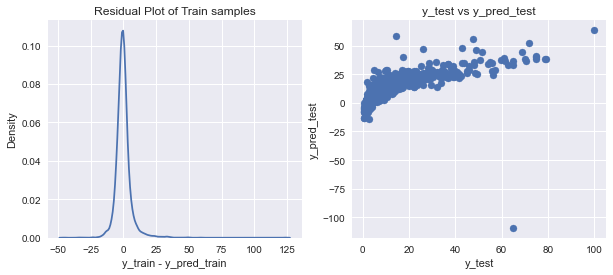

In [41]:
plots(y_train,y_test,y_pred_train,y_pred_test)

### Random Forest

In [42]:
rf = RandomForestRegressor(n_estimators = 100)     #decision forest (builds decision trees)  used for classification and regression problems
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
r2_score(y_test, y_pred_test)

0.8975694275885991

In [43]:
with open('random_forest_model', 'wb') as files:
    pickle.dump(rf, files)

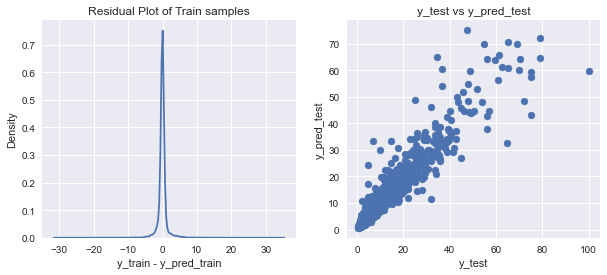

In [44]:
plots(y_train,y_test,y_pred_train,y_pred_test)

### GradientBoostingRegressor

In [45]:
gradientBoostingRegressor = GradientBoostingRegressor()    #uses decision trees and takes each decision using grad boosting
gradientBoostingRegressor.fit(X_train, y_train)
y_pred_test = gradientBoostingRegressor.predict(X_test)
y_pred_train = gradientBoostingRegressor.predict(X_train)
r2_score(y_test, y_pred_test)

0.8807738080869169

In [46]:
with open('gradient_boosting_model', 'wb') as files:
    pickle.dump(gradientBoostingRegressor, files)

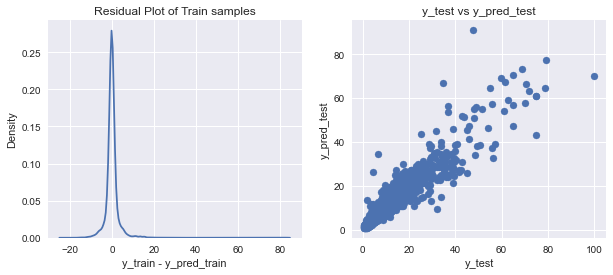

In [47]:
plots(y_train,y_test,y_pred_train,y_pred_test)